<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°03

## Objetivos del laboratorio

* Reforzar conceptos básicos de análisis no supervisado.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

## 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables numéricas a categóricas ocupando el comando **get_dummies** de pandas ([refrenecia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


In [4]:
#PROCESAMOS DATOS NUMÉRICOS
df_num = df._get_numeric_data()

names = list(df_num)
nan_numb = [ len( df_num[i][ pd.isnull(df_num[i]) ] ) for i in names ]
#Al printear nan_numb aquí vemos que tenemos que reemplazar a lo más 5 elementos.
for i in names:
    df_num[i][df_num[i].isnull()] = sum(df_num[i][df_num[i].notnull()])/len(df_num[i][df_num[i].notnull()])

nan_numb = [ len( df_num[i][ pd.isnull(df_num[i]) ] ) for i in names ]
#AL PRINTEAR nan_numb AQUI SE APRECIA QUE YA NO QUEDAN VALORES NULOS EN LA TABLA
nan_numb

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[0, 0, 0, 0, 0]

In [5]:
scaler = MinMaxScaler()
df_num = scaler.fit_transform(df_num)


In [6]:
#PROCESAMOS DATOS CATEGORICOS
df_cat = df[['clase_tipo', 'traccion_tipo','transmision_tipo','combustible_tipo','tamano_motor_tipo','consumo_tipo','co2_tipo']]

In [7]:
names = list(df_cat)
nan_numb = [ len( df_cat[i][ pd.isnull(df_cat[i]) ] ) for i in names ]
#AQUI PODEMOS OBSERVAR QUE HAY DOS FILAS CON VALORES NAN, LOS CUALES SE REEMPLAZARAN POR LA MODA
#DE LA RESPECTIVA COLUMNA


In [8]:
for i in names:
    df_cat[i][df_cat[i].isnull()] = [df_cat[i].mode(), df_cat[i].mode()]
nan_numb = [ len( df_cat[i][ pd.isnull(df_cat[i]) ] ) for i in names ]
nan_numb

/opt/venv/lib/python3.7/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


[0, 0, 0, 0, 0, 0, 0]

In [9]:
#OBTENEMOS VALORES DUMMIES
df_cat=pd.get_dummies(df_cat)

In [10]:
#VERIFICAMOS DIMENSIONES PARA UNIR DATAFRAMES
print(df_cat.shape)
print(df_num.shape)

(36791, 31)
(36791, 5)


In [11]:
df_num=pd.DataFrame(df_num)

In [12]:
df_procesado = pd.concat([df_num ,df_cat],axis=1)

In [13]:
df_procesado.shape

(36791, 36)

## 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

In [14]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(df_procesado)

centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

In [15]:
names = list(df_procesado)
df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')
centroids_df = pd.DataFrame(centroids, columns=names)
centroids_df["cluster"] = [1,2,3,4,5,6,7,8]

In [17]:
df_procesado.groupby('cluster').mean()

,0,1,2,3,4,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.384236,0.585590,0.430797,0.510289,0.454503,0.259250,0.005599,0.059153,0.059396,0.197420,...,0.031159,0.000000,0.011685,0.957157,0.000000,0.001704,0.000000,0.000487,0.997809,0.000000
1,0.409209,0.333730,0.257964,0.354182,0.281221,0.178272,0.083817,0.093327,0.135558,0.182302,...,0.000000,0.032882,0.961960,0.000000,0.005158,0.001451,0.000645,0.997905,0.000000,0.000000
2,0.524326,0.250778,0.195544,0.304383,0.226563,0.062355,0.095167,0.045745,0.153710,0.448468,...,0.000000,0.976855,0.000000,0.000000,0.023145,0.000000,0.993329,0.005310,0.000000,0.001361
3,0.695702,0.179404,0.150728,0.240178,0.156814,0.000000,0.110189,0.027742,0.181747,0.546539,...,0.000000,0.000000,0.000259,0.000000,0.999741,0.000000,0.017371,0.000519,0.000000,0.982110
4,0.476852,0.450916,0.327240,0.409956,0.343253,0.304255,0.017105,0.041480,0.048535,0.150951,...,0.958520,0.000000,0.040624,0.000855,0.000000,0.995082,0.000641,0.000641,0.003635,0.000000
5,0.452443,0.562730,0.405562,0.501887,0.442585,0.435441,0.001318,0.003953,0.010211,0.058300,...,0.057642,0.000000,0.005599,0.936759,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
6,0.438404,0.159576,0.141184,0.242287,0.156504,0.016407,0.124861,0.006396,0.092881,0.709956,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.002781,0.001390,0.000000,0.995829
7,0.588065,0.362121,0.299467,0.354068,0.282213,0.001512,0.083921,0.086442,0.190020,0.561240,...,0.000504,0.027470,0.972026,0.000000,0.000000,0.023185,0.000000,0.976815,0.000000,0.000000


In [19]:
df_procesado.groupby('cluster').agg(lambda x: x.value_counts().index[0])

,0,1,2,3,4,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.564103,0.428571,0.454199,0.393464,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0.000000,0.307692,0.285714,0.374603,0.305011,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0.823529,0.179487,0.142857,0.317749,0.241830,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0.970588,0.179487,0.142857,0.275108,0.194444,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0.029412,0.474359,0.285714,0.424351,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
5,0.558824,0.653846,0.428571,0.454199,0.393464,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
6,0.029412,0.179487,0.142857,0.275108,0.194444,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
7,0.617647,0.307692,0.285714,0.374603,0.281734,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


## 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [20]:

Clusternumbers = [5, 10, 20, 30, 50, 75, 100, 200, 300]
kmeans = [KMeans(n_clusters=i) for i in Clusternumbers]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]

,Number of Clusters,Score
0,5,128220.719736
1,10,83741.660045
2,20,67042.832705
3,30,56935.300687
4,50,45727.310799


In [22]:
df_codo = pd.DataFrame({'NumeroDeClusters':Clusternumbers,
                        'Score':score})

df_codo.head()

,NumeroDeClusters,Score
0,5,128220.719736
1,10,83741.660045
2,20,67042.832705
3,30,56935.300687
4,50,45727.310799


<AxesSubplot:title={'center':'Codo'}, xlabel='NumeroDeClusters', ylabel='Score'>

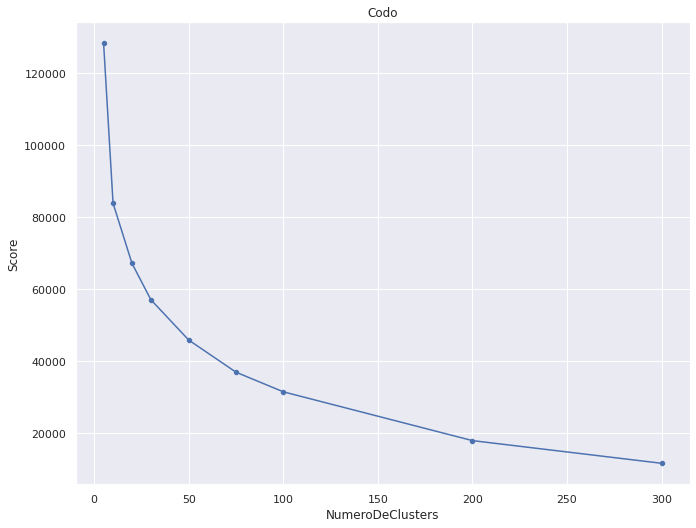

In [23]:
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Codo')
sns.lineplot(x="NumeroDeClusters",
             y="Score",
            data=df_codo)
sns.scatterplot(x="NumeroDeClusters",
             y="Score",
             data=df_codo)